In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [49]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)


In [50]:
#order of top performing features from pre-processing
top_list = ['Store', 'MDSum', 'MDAverage', 'MDMax', 'MarkDown1', 'MDMin', 'MarkDown5', 'MarkDown4', 'CPI', 'Unemployment',
        'Dept','MarkDown2', 'MarkDown3', 'Temperature', 'Date', 'IsHoliday', 'Fuel_Price']

In [51]:
reg = LinearRegression().fit(x_train,y_train)

In [52]:
reg.score(x_train, y_train)

0.09232179747989522

In [53]:
reg.score(x_test, y_test)

0.09461103425148987

In [54]:
y_pred = reg.predict(x_test)

In [72]:
print("Coefficients: \n", reg.coef_)
print('Intercept: \n', reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Mean Abs Error:', mean_absolute_error(y_test, y_pred))

Coefficients: 
 [[-5.75533357e-01  3.29247675e-01 -2.81883837e-01  2.90957382e-02
   1.13269522e-01  3.28552324e-02 -1.39104379e+12 -1.39104379e+12
  -1.39104379e+12 -1.39104379e+12 -1.39104379e+12 -4.25518021e-01
  -1.87690817e-01  5.42982290e-01  3.19397204e+00 -4.61065115e+11
   1.48325681e+12  9.17597619e-01  5.55024808e-04]]
Intercept: 
 [20.21149341]
Mean squared error: 89.37
Coefficient of determination: 0.09
Mean Abs Error: 7.761002143805635


In [56]:
print(x_train.shape)
print(x_test.shape)

(330177, 19)
(82545, 19)


In [57]:
train_sizes = [1, 25, 50, 100, 500, 2500, 7500, 15000]

In [58]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = reg,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [59]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-18.61223506 -36.11567602 -36.11567602 -36.11567602 -36.11567602]
 [-53.1299678  -61.74122878 -61.74122878 -61.74122878 -61.74122878]
 [-68.42428704 -77.77535983 -77.77535983 -77.77535983 -77.77535983]
 [-79.63469312 -83.61800087 -83.61800087 -83.61800087 -83.61800087]
 [-89.94128046 -91.13038605 -91.13038605 -91.13038605 -91.13038605]
 [-89.97900517 -90.24707848 -90.24707848 -90.24707848 -90.24707848]
 [-88.72189276 -89.293154   -89.293154   -89.293154   -89.293154  ]]

 ----------------------------------------------------------------------

Validation scores:

 [[  -108.76556472   -114.69182139   -114.97285315   -115.25951927
    -115.75151011]
 [ -3019.55766874 -51653.78927309 -56300.21296851 -58304.44064189
  -47381.44905236]
 [  -240.11806573  -1448.5877546   -1572.77065609  -1612.13298749
   -1342.74714405]
 [  -151.29150981   -813.58627953   -878.93201239   -898.59291815
    -758.41207991]
 

In [60]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1        -0.000000
25       32.614988
50       60.018977
100      75.905145
500      82.821339
2500     90.892565
7500     90.193464
15000    89.178902
dtype: float64

 --------------------

Mean validation scores

 1          113.888254
25       43331.889921
50        1243.271322
100        700.162960
500         95.737983
2500        90.207346
7500        89.677309
15000       89.621967
dtype: float64


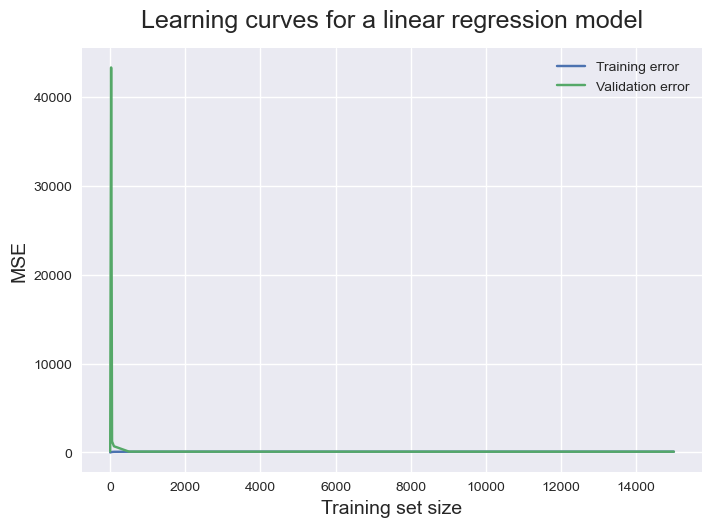

In [61]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()


(88.0, 92.0)

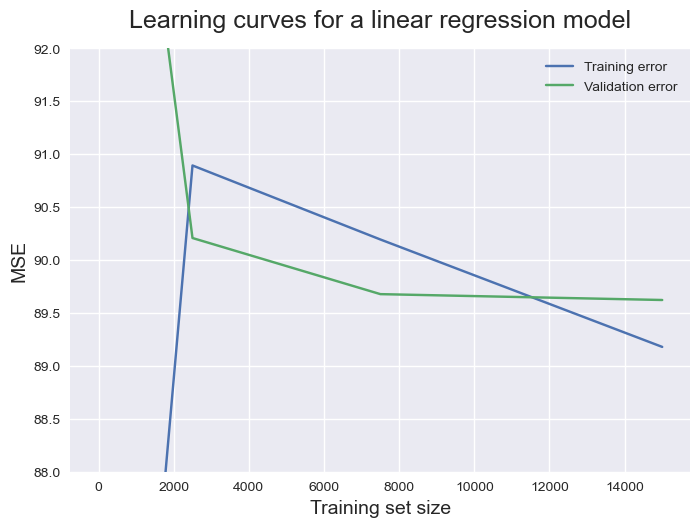

In [70]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(88,92)

(0.0, 3000.0)

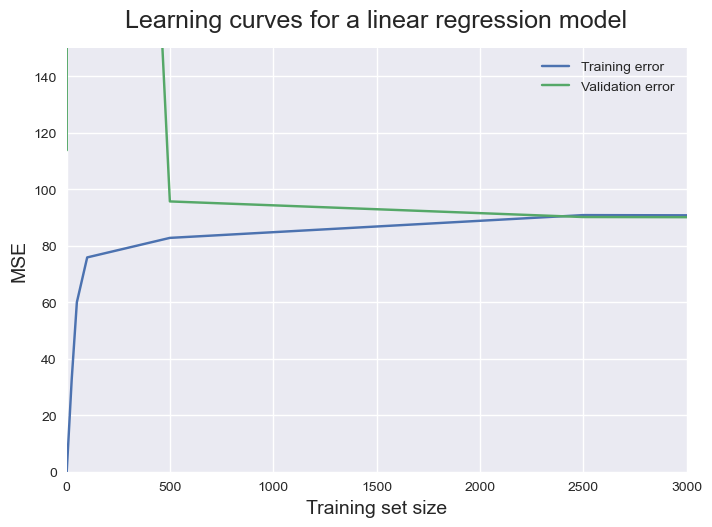

In [63]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,150)
plt.xlim(0,3000)


(10000.0, 13000.0)

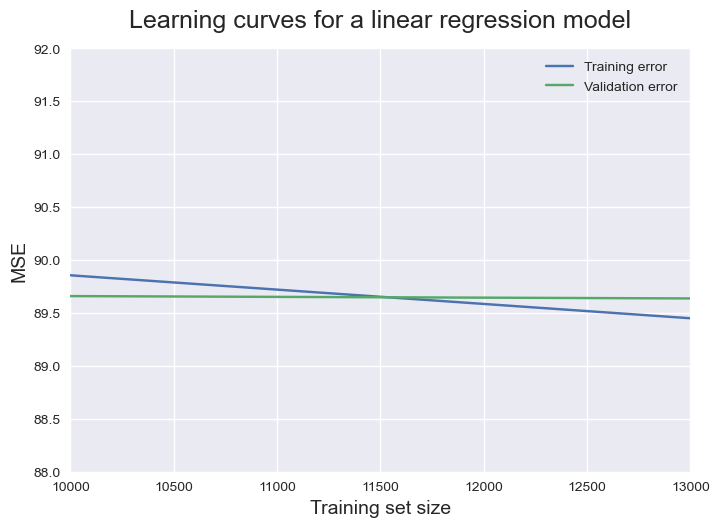

In [66]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(88,92)
plt.xlim(10000,13000)


In [17]:
top7_x_train = x_train[top_list[:7]]
top7_x_test = x_test[top_list[:7]]
top7_x_train

,Store,MDSum,MDAverage,MDMax,MarkDown1,MDMin,MarkDown5
0,1.392183,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
1,-1.188910,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
2,-1.188910,-0.245190,-0.049038,0.081929,-0.252011,-0.252011,0.081929
3,0.140744,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
4,0.062529,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
...,...,...,...,...,...,...,...
330172,0.375389,12.476386,2.495277,6.259835,6.068185,-0.134782,0.356177
330173,1.392183,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
330174,-0.641405,4.212100,0.842420,3.053010,3.053010,-0.173069,0.261853
330175,-0.484975,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181


In [18]:
reg7 = LinearRegression().fit(top7_x_train,y_train)

In [19]:
reg7.score(top7_x_train, y_train)

0.014089843219254106

In [20]:
reg7.score(top7_x_test, y_test)

0.015316189841475314

In [21]:
y_pred = reg7.predict(top7_x_test)

In [22]:
print("Coefficients: \n", reg.coef_)
print('Intercept: \n', reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-5.75533357e-01  3.29247675e-01 -2.81883837e-01  2.90957382e-02
   1.13269522e-01  3.28552324e-02 -1.39104379e+12 -1.39104379e+12
  -1.39104379e+12 -1.39104379e+12 -1.39104379e+12 -4.25518021e-01
  -1.87690817e-01  5.42982290e-01  3.19397204e+00 -4.61065115e+11
   1.48325681e+12  9.17597619e-01  5.55024808e-04]]
Intercept: 
 [20.21149341]
Mean squared error: 97.20
Coefficient of determination: 0.02


Predict for submission

In [23]:
#provided submission test dataset
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

#test dataset after preprocessing
#url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/Submission%20Test.csv'
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [24]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [25]:
submission_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842


In [26]:
y_pred = reg.predict(submission_test)
y_pred

array([[20.63224549],
       [20.64298767],
       [20.65372986],
       ...,
       [18.8857318 ],
       [18.90721617],
       [18.91795836]])

In [27]:
weekly_sales = y_pred[:,0]**3
weekly_sales

array([8782.93137549, 8796.65703029, 8810.39697762, ..., 6735.99030617,
       6759.00501971, 6770.53200887])

In [28]:
weekly_sales[0]

8782.931375488502

In [29]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
linReg_submission = pd.DataFrame(data=sub)

linReg_submission['Weekly_Sales'] = round(linReg_submission['Weekly_Sales'], 2)

linReg_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,8782.93
1,1_1_2012-11-09,8796.66
2,1_1_2012-11-16,8810.40
3,1_1_2012-11-23,8824.15
4,1_1_2012-11-30,8837.92
...,...,...
115059,45_98_2013-06-28,6713.03
115060,45_98_2013-07-05,6724.50
115061,45_98_2013-07-12,6735.99
115062,45_98_2013-07-19,6759.01


In [30]:
linReg_submission['Weekly_Sales'][1]

8796.66

In [31]:
linReg_submission.to_csv('Submission Files/Linear Regression.csv', float_format='%.2f',index=False)

In [32]:
submission_test[top_list[:7]]

,Store,MDSum,MDAverage,MDMax,MarkDown1,MDMin,MarkDown5
0,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
1,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
2,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
3,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
4,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
...,...,...,...,...,...,...,...
115059,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842
115060,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842
115061,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842
115062,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842


In [33]:
y_pred = reg7.predict(submission_test[top_list[:7]])
y_pred

array([[21.35541132],
       [21.35541132],
       [21.35541132],
       ...,
       [18.00564563],
       [18.00564563],
       [18.00564563]])

In [34]:
weekly_sales = y_pred[:,0]**3
weekly_sales

array([9739.2120607 , 9739.2120607 , 9739.2120607 , ..., 5837.48927421,
       5837.48927421, 5837.48927421])

In [35]:
weekly_sales[0]

9739.212060696273

In [36]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
linReg_submission2 = pd.DataFrame(data=sub)

linReg_submission2['Weekly_Sales'] = round(linReg_submission['Weekly_Sales'], 2)

linReg_submission2

,Id,Weekly_Sales
0,1_1_2012-11-02,8782.93
1,1_1_2012-11-09,8796.66
2,1_1_2012-11-16,8810.40
3,1_1_2012-11-23,8824.15
4,1_1_2012-11-30,8837.92
...,...,...
115059,45_98_2013-06-28,6713.03
115060,45_98_2013-07-05,6724.50
115061,45_98_2013-07-12,6735.99
115062,45_98_2013-07-19,6759.01


In [37]:
linReg_submission2['Weekly_Sales'].value_counts()

7813.51     4
8336.38     4
7587.32     4
8305.70     4
14121.37    4
           ..
7360.52     1
7348.33     1
7311.85     1
7287.59     1
6770.53     1
Name: Weekly_Sales, Length: 109235, dtype: int64

In [39]:
linReg_submission2.to_csv('Submission Files/Linear Regression 2.csv', float_format='%.2f',index=False)